In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = 'https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv'
df = pd.read_csv(url)


In [3]:
# Generate random heights between 150 and 180 cm
df['height'] = np.random.randint(150, 181, size=df.shape[0])

# Check for consistency and integrity (e.g., missing values)
df.info()  # Check data types and missing values
df.describe()  # Summary statistics to confirm changes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
 9   height    458 non-null    int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.1+ KB


,Number,Age,Weight,Salary,height
count,458.000000,458.000000,458.000000,4.470000e+02,458.000000
mean,17.713974,26.934498,221.543668,4.833970e+06,164.921397
std,15.966837,4.400128,26.343200,5.226620e+06,8.688528
min,0.000000,19.000000,161.000000,3.088800e+04,150.000000
25%,5.000000,24.000000,200.000000,1.025210e+06,157.000000
50%,13.000000,26.000000,220.000000,2.836186e+06,165.000000
75%,25.000000,30.000000,240.000000,6.500000e+06,172.000000
max,99.000000,40.000000,307.000000,2.500000e+07,180.000000


Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

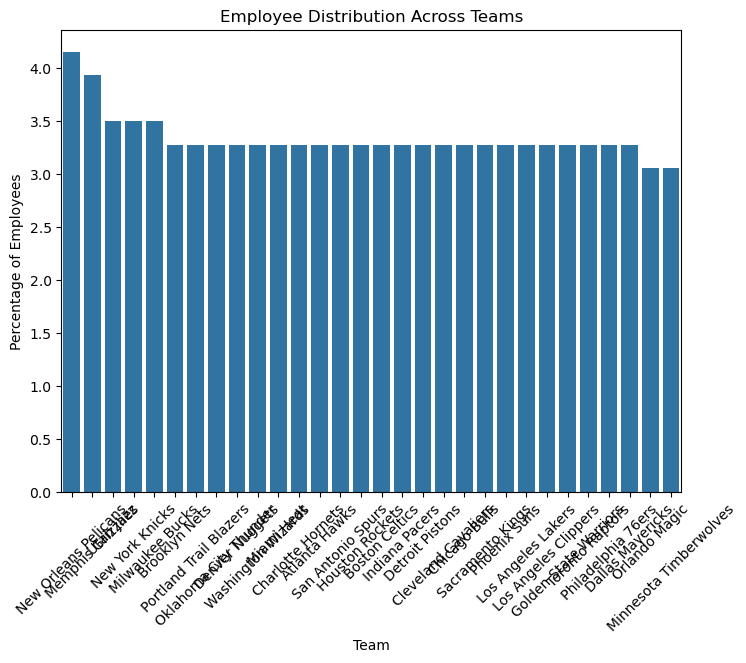

In [9]:
# Calculate team distribution
team_distribution = df['Team'].value_counts(normalize=True) * 100
print(team_distribution)

# Visualize team distribution
plt.figure(figsize=(8,6))
sns.barplot(x=team_distribution.index, y=team_distribution.values)
plt.title('Employee Distribution Across Teams')
plt.ylabel('Percentage of Employees')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.show()


Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


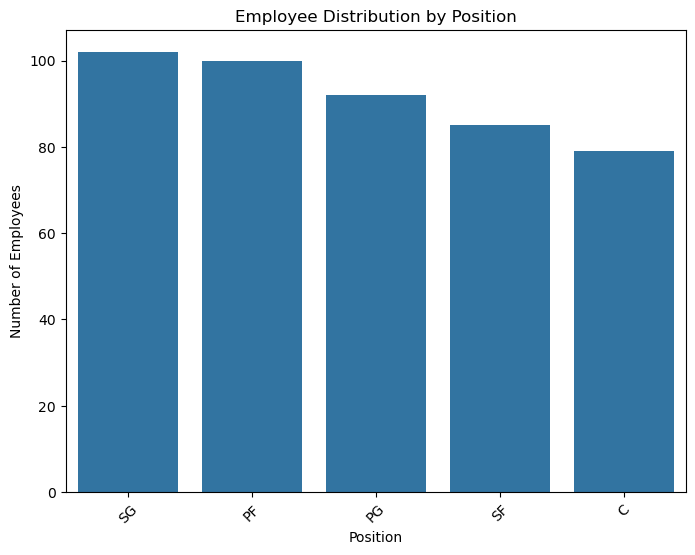

In [13]:
# Group employees by position
position_distribution = df['Position'].value_counts()
print(position_distribution)

# Visualize positions
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Position', order=position_distribution.index)
plt.title('Employee Distribution by Position')
plt.ylabel('Number of Employees')
plt.xlabel('Position')
plt.xticks(rotation=45)
plt.show()


age_group
26-35    272
18-25    154
36-45     32
46-60      0
60+        0
Name: count, dtype: int64


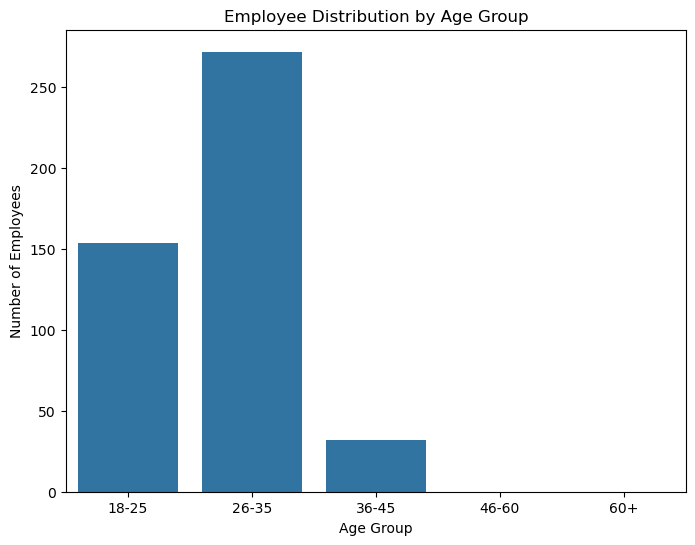

In [17]:
# Define age groups
age_bins = [18, 25, 35, 45, 60, 100]
age_labels = ['18-25', '26-35', '36-45', '46-60', '60+']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate age group distribution
age_group_distribution = df['age_group'].value_counts()
print(age_group_distribution)

# Visualize age group distribution
plt.figure(figsize=(8,6))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values)
plt.title('Employee Distribution by Age Group')
plt.ylabel('Number of Employees')
plt.xlabel('Age Group')
plt.show()


Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolves     59709697.0
Boston 

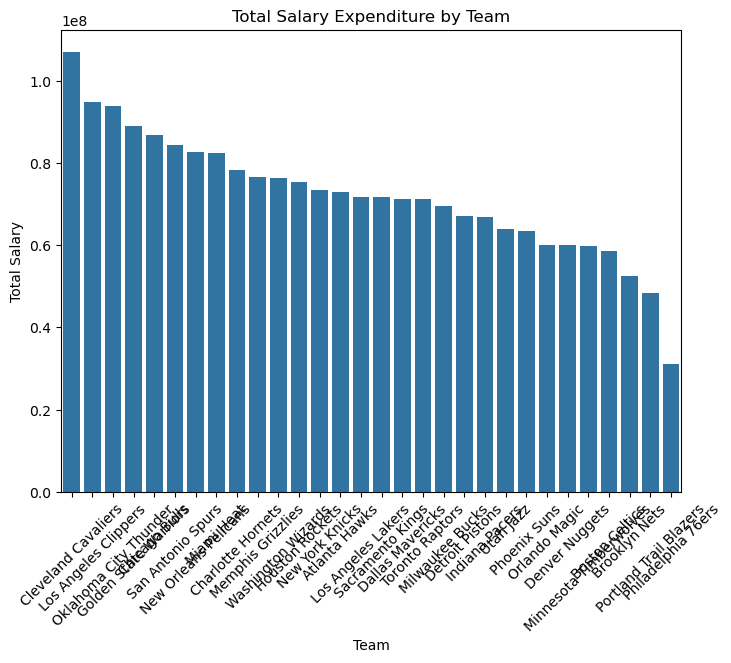

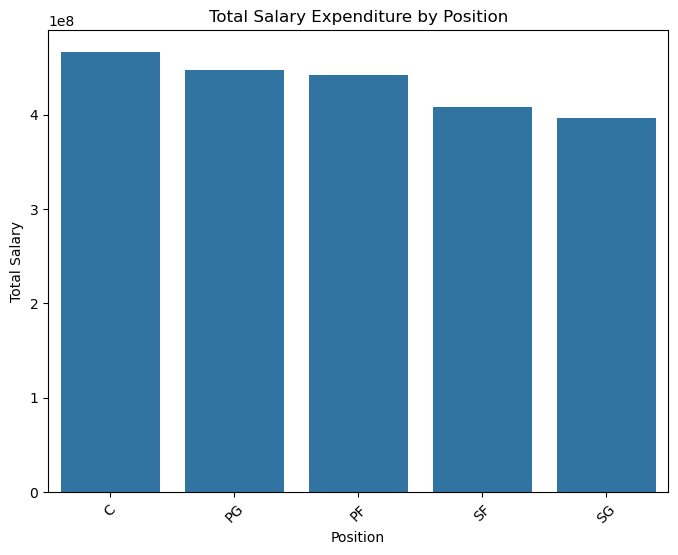

In [19]:
# Calculate total salary expenditure by team
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
print(team_salary)

# Calculate total salary expenditure by position
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)
print(position_salary)

# Visualize salary expenditures
plt.figure(figsize=(8,6))
sns.barplot(x=team_salary.index, y=team_salary.values)
plt.title('Total Salary Expenditure by Team')
plt.ylabel('Total Salary')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x=position_salary.index, y=position_salary.values)
plt.title('Total Salary Expenditure by Position')
plt.ylabel('Total Salary')
plt.xlabel('Position')
plt.xticks(rotation=45)
plt.show()


             Age    Salary
Age     1.000000  0.214009
Salary  0.214009  1.000000


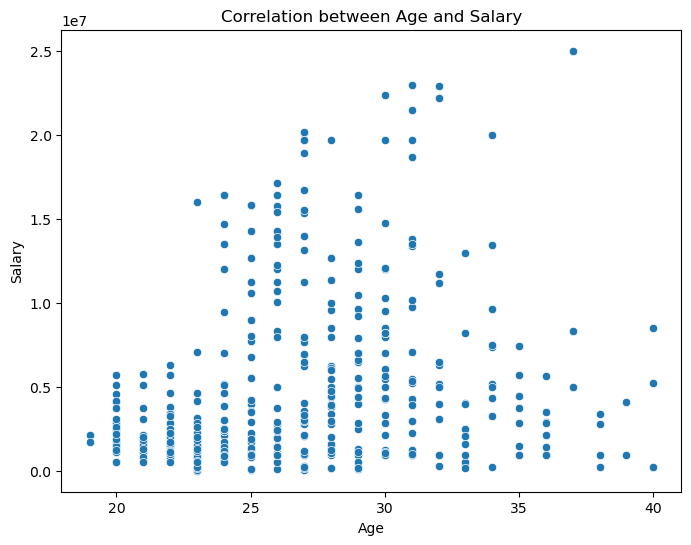

In [21]:
# Correlation between age and salary
correlation = df[['Age', 'Salary']].corr()
print(correlation)

# Visualize the correlation
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()
